In [1]:
import pandas as pd
import numpy as np
!pip install matplotlib seaborn
import matplotlib.pyplot as plt


In [2]:
test = pd.read_csv("/content/drive/MyDrive/AI ML IITM saasthra/test.csv")

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
test.head()

,INDEX,DATE,LATITUDE_A,LONGITUDE_A,ELEVATION_A,PRCP_A,SNWD_A,TMAX_A,TMIN_A,TAVG_A,...,LATITUDE_C,LONGITUDE_C,ELEVATION_C,PRCP_C,SNWD_C,TMAX_C,TMIN_C,TAVG_C,LATITUDE,LONGITUDE
0,0,04-11-1978,63.883,77.517,128,0.0,0.0,5.0,NaN,2.3,...,63.083,78.933,64,NaN,0.00,8.0,NaN,3.0,63.933,78.733
1,1,11-04-1980,63.883,77.517,128,NaN,0.0,NaN,NaN,9.3,...,63.083,78.933,64,0.0,0.00,28.0,8.0,15.0,63.933,78.733
2,2,29-04-1977,63.883,77.517,128,NaN,0.0,NaN,NaN,18.0,...,63.083,78.933,64,0.0,2.89,30.0,NaN,15.8,63.933,78.733
3,3,12-10-1977,63.883,77.517,128,0.0,0.0,16.0,NaN,9.8,...,63.083,78.933,64,0.0,0.00,19.0,NaN,12.4,63.933,78.733
4,4,02-09-1980,63.883,77.517,128,NaN,0.0,29.0,10.0,18.8,...,63.083,78.933,64,500.0,0.00,30.0,NaN,21.4,63.933,78.733


In [5]:

null_count_per_column = test.isnull().sum()
print("Number of null values per column:")
print(null_count_per_column)

Number of null values per column:
INDEX            0
DATE             0
LATITUDE_A       0
LONGITUDE_A      0
ELEVATION_A      0
PRCP_A         133
SNWD_A           0
TMAX_A          61
TMIN_A         145
TAVG_A           0
LATITUDE_B       0
LONGITUDE_B      0
ELEVATION_B      0
PRCP_B           0
SNWD_B           0
TMAX_B           0
TMIN_B           0
TAVG_B           0
LATITUDE_C       0
LONGITUDE_C      0
ELEVATION_C      0
PRCP_C          45
SNWD_C           0
TMAX_C          52
TMIN_C         108
TAVG_C           6
LATITUDE         0
LONGITUDE        0
dtype: int64


In [6]:
test['DATE'] = pd.to_datetime(test['DATE'], format='%d-%m-%Y')


In [7]:
test_sorted = test.sort_values(by='DATE', ascending=True)


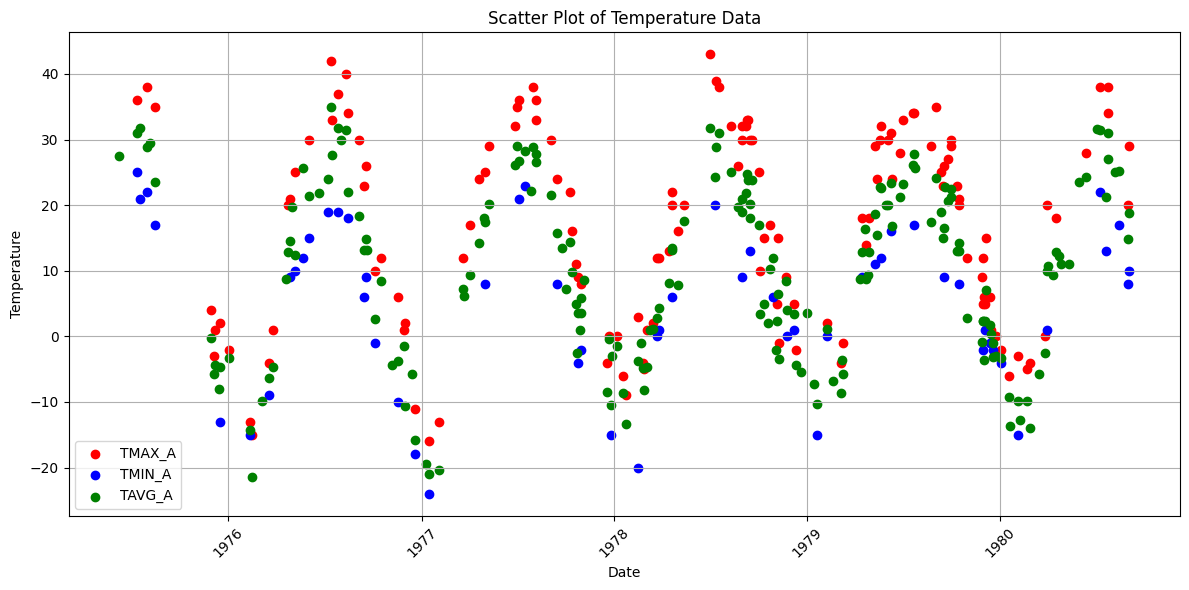

In [8]:
plt.figure(figsize=(12, 6))

# Scatter plot for TMAX_A vs DATE
plt.scatter(test['DATE'], test['TMAX_A'], color='red', label='TMAX_A')

# Scatter plot for TMIN_A vs DATE
plt.scatter(test['DATE'], test['TMIN_A'], color='blue', label='TMIN_A')

# Scatter plot for TAVG_A vs DATE
plt.scatter(test['DATE'], test['TAVG_A'], color='green', label='TAVG_A')

# Customize plot
plt.title('Scatter Plot of Temperature Data')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [9]:
# Calculate 'tavg_A'
test['tavg_A'] = test['TAVG_A'].combine_first((test['TMAX_A'] + test['TMIN_A']) / 2)

# Fill missing TMAX_A values using the formula TAVG_A * 2 - TMIN_A
test['tmax_A'] = test['TMAX_A'].combine_first(test['TAVG_A'] * 2 - test['TMIN_A'])

# Fill missing TMIN_A values using the formula TAVG_A * 2 - TMAX_A
test['tmin_A'] = test['TMIN_A'].combine_first(test['TAVG_A'] * 2 - test['TMAX_A'])

# Display the first 10 rows of the DataFrame
print(test.head(10))

# Calculate 'tavg_B'
test['tavg_B'] = test['TAVG_B'].combine_first((test['TMAX_B'] + test['TMIN_B']) / 2)

# Fill missing TMAX_B values using the formula TAVG_B * 2 - TMIN_B
test['tmax_B'] = test['TMAX_B'].combine_first(test['TAVG_B'] * 2 - test['TMIN_B'])

# Fill missing TMIN_B values using the formula TAVG_B * 2 - TMAX_B
test['tmin_B'] = test['TMIN_B'].combine_first(test['TAVG_B'] * 2 - test['TMAX_B'])

# Display the first 10 rows of the DataFrame

# Calculate 'tavg_C'
test['tavg_C'] = test['TAVG_C'].combine_first((test['TMAX_C'] + test['TMIN_C']) / 2)

# Fill missing TMAX_C values using the formula TAVG_C * 2 - TMIN_C
test['tmax_C'] = test['TMAX_C'].combine_first(test['TAVG_C'] * 2 - test['TMIN_C'])

# Fill missing TMIN_C values using the formula TAVG_C * 2 - TMAX_C
test['tmin_C'] = test['TMIN_C'].combine_first(test['TAVG_C'] * 2 - test['TMAX_C'])

# Display the first 10 rows of the DataFrame


   INDEX       DATE  LATITUDE_A  LONGITUDE_A  ELEVATION_A  PRCP_A  SNWD_A  \
0      0 1978-11-04      63.883       77.517          128     0.0     0.0   
1      1 1980-04-11      63.883       77.517          128     NaN     0.0   
2      2 1977-04-29      63.883       77.517          128     NaN     0.0   
3      3 1977-10-12      63.883       77.517          128     0.0     0.0   
4      4 1980-09-02      63.883       77.517          128     NaN     0.0   
5      5 1978-01-06      63.883       77.517          128     NaN     0.0   
6      6 1979-09-19      63.883       77.517          128     0.0     0.0   
7      7 1978-04-15      63.883       77.517          128     NaN     0.0   
8      8 1980-04-15      63.883       77.517          128     NaN     0.0   
9      9 1979-07-02      63.883       77.517          128     NaN     0.0   

   TMAX_A  TMIN_A  TAVG_A  ...  PRCP_C  SNWD_C  TMAX_C  TMIN_C  TAVG_C  \
0     5.0     NaN     2.3  ...     NaN    0.00     8.0     NaN     3.0   
1   

In [10]:
null_count_per_column = test.isnull().sum()
print("Number of null values per column:")
print(null_count_per_column)

Number of null values per column:
INDEX            0
DATE             0
LATITUDE_A       0
LONGITUDE_A      0
ELEVATION_A      0
PRCP_A         133
SNWD_A           0
TMAX_A          61
TMIN_A         145
TAVG_A           0
LATITUDE_B       0
LONGITUDE_B      0
ELEVATION_B      0
PRCP_B           0
SNWD_B           0
TMAX_B           0
TMIN_B           0
TAVG_B           0
LATITUDE_C       0
LONGITUDE_C      0
ELEVATION_C      0
PRCP_C          45
SNWD_C           0
TMAX_C          52
TMIN_C         108
TAVG_C           6
LATITUDE         0
LONGITUDE        0
tavg_A           0
tmax_A          49
tmin_A          49
tavg_B           0
tmax_B           0
tmin_B           0
tavg_C           6
tmax_C          31
tmin_C          31
dtype: int64


In [11]:
columns_to_drop = ["TMAX_A","TMIN_A","TAVG_A","TMAX_B","TMIN_B","TAVG_B","TMAX_C","TMIN_C","TAVG_C"]
Test = test.drop(columns=columns_to_drop)

In [12]:
# 1. Calculate the TAVG values based on TMAX and TMIN for columns tavg_A, tmax_A, tmin_A
Test['Calculated_tavg_A'] = (Test['tmax_A'] + Test['tmin_A']) / 2
Test['Calculated_tavg_B'] = (Test['tmax_B'] + Test['tmin_B']) / 2
Test['Calculated_tavg_C'] = (Test['tmax_C'] + Test['tmin_C']) / 2

# Check for mismatches in tavg_A
mismatch_tavg_A = Test[(~Test['tavg_A'].isna()) & (~Test['Calculated_tavg_A'].isna()) & (Test['tavg_A'] != Test['Calculated_tavg_A'])]

# Check for mismatches in tavg_B
mismatch_tavg_B = Test[(~Test['tavg_B'].isna()) & (~Test['Calculated_tavg_B'].isna()) & (Test['tavg_B'] != Test['Calculated_tavg_B'])]

# Check for mismatches in tavg_C
mismatch_tavg_C = Test[(~Test['tavg_C'].isna()) & (~Test['Calculated_tavg_C'].isna()) & (Test['tavg_C'] != Test['Calculated_tavg_C'])]

# 2. Check that TMIN is less than or equal to TMAX for all sets (A, B, C)
mismatch_tmin_max_A = Test[(~Test['tmin_A'].isna()) & (~Test['tmax_A'].isna()) & (Test['tmin_A'] > Test['tmax_A'])]
mismatch_tmin_max_B = Test[(~Test['tmin_B'].isna()) & (~Test['tmax_B'].isna()) & (Test['tmin_B'] > Test['tmax_B'])]
mismatch_tmin_max_C = Test[(~Test['tmin_C'].isna()) & (~Test['tmax_C'].isna()) & (Test['tmin_C'] > Test['tmax_C'])]

# Display results for tavg_A
print("Mismatches in tavg_A:")
print(mismatch_tavg_A[['DATE', 'tmax_A', 'tmin_A', 'tavg_A', 'Calculated_tavg_A']])

# Display results for tavg_B
print("\nMismatches in tavg_B:")
print(mismatch_tavg_B[['DATE', 'tmax_B', 'tmin_B', 'tavg_B', 'Calculated_tavg_B']])

# Display results for tavg_C
print("\nMismatches in tavg_C:")
print(mismatch_tavg_C[['DATE', 'tmax_C', 'tmin_C', 'tavg_C', 'Calculated_tavg_C']])

# Display results for TMIN > TMAX mismatches in A
print("\nRows where tmin_A > tmax_A:")
print(mismatch_tmin_max_A[['DATE', 'tmax_A', 'tmin_A', 'tavg_A']])

# Display results for TMIN > TMAX mismatches in B
print("\nRows where tmin_B > tmax_B:")
print(mismatch_tmin_max_B[['DATE', 'tmax_B', 'tmin_B', 'tavg_B']])

# Display results for TMIN > TMAX mismatches in C
print("\nRows where tmin_C > tmax_C:")
print(mismatch_tmin_max_C[['DATE', 'tmax_C', 'tmin_C', 'tavg_C']])


Mismatches in tavg_A:
          DATE  tmax_A  tmin_A  tavg_A  Calculated_tavg_A
4   1980-09-02    29.0    10.0    18.8               19.5
13  1977-07-04    36.0    21.0    26.8               28.5
16  1979-05-20    32.0    12.0    22.6               22.0
17  1976-07-27    37.0    19.0    31.8               28.0
22  1979-11-27     9.0   -10.6    -0.8               -0.8
29  1980-03-29    20.0     1.0    10.0               10.5
34  1979-12-02     6.0   -13.2    -3.6               -3.6
46  1976-06-01    30.0    15.0    21.4               22.5
47  1980-02-03    -3.0   -15.0    -9.8               -9.0
50  1975-11-30     4.0    -4.4    -0.2               -0.2
52  1979-07-22    34.0    17.0    27.8               25.5
53  1976-11-17     6.0   -10.0    -3.8               -2.0
61  1976-05-06    25.0    10.0    12.4               17.5
62  1979-12-13     6.0    -1.0     1.8                2.5
64  1977-09-14    24.0     8.0    15.8               16.0
72  1980-08-30    20.0     8.0    14.8            

In [13]:
import pandas as pd

# Replace mismatches in tmin_A and tmax_A
Test.loc[Test['tmin_A'] > Test['tmax_A'], ['tmin_A', 'tmax_A']] = Test.loc[Test['tmin_A'] > Test['tmax_A'], ['tmax_A', 'tmin_A']].values

# Replace mismatches in tmin_B and tmax_B
Test.loc[Test['tmin_B'] > Test['tmax_B'], ['tmin_B', 'tmax_B']] = Test.loc[Test['tmin_B'] > Test['tmax_B'], ['tmax_B', 'tmin_B']].values

# Replace mismatches in tmin_C and tmax_C
Test.loc[Test['tmin_C'] > Test['tmax_C'], ['tmin_C', 'tmax_C']] = Test.loc[Test['tmin_C'] > Test['tmax_C'], ['tmax_C', 'tmin_C']].values


In [14]:
print(Test[['DATE', 'tmax_A', 'tmin_A','tavg_A' ,'tmax_B', 'tmin_B','tavg_B', 'tmax_C', 'tmin_C','tavg_C']])

          DATE  tmax_A  tmin_A  tavg_A  tmax_B  tmin_B  tavg_B  tmax_C  \
0   1978-11-04     5.0    -0.4     2.3     8.0    -3.9     1.3     8.0   
1   1980-04-11     NaN     NaN     9.3    23.6     6.1    14.1    28.0   
2   1977-04-29     NaN     NaN    18.0    30.4     9.3    20.6    30.0   
3   1977-10-12    16.0     3.6     9.8    18.1     5.1    11.1    19.0   
4   1980-09-02    29.0    10.0    18.8    29.5     9.0    18.8    30.0   
..         ...     ...     ...     ...     ...     ...     ...     ...   
198 1979-06-03    30.0    10.0    20.0    35.5    15.1    25.3    35.0   
199 1979-09-11    25.0    13.0    19.0    27.6    16.8    22.1    32.0   
200 1980-07-24    34.0    20.0    27.0    36.4    20.1    27.6     NaN   
201 1976-12-20   -11.0   -18.0   -15.8    -4.6   -15.0   -10.8     NaN   
202 1980-04-26     NaN     NaN    11.0    28.0     9.3    18.5    20.0   

     tmin_C  tavg_C  
0      -2.0     3.0  
1       8.0    15.0  
2       1.6    15.8  
3       5.8    12.4  
4

In [15]:
# Calculate the average difference between TMAX/TAVG and TMIN/TAVG where all values are present
avg_delta_max_A = (Test['tmax_A'] - Test['tavg_A']).mean(skipna=True)
avg_delta_min_A = (Test['tavg_A'] - Test['tmin_A']).mean(skipna=True)

# Fill in missing TMAX and TMIN based on TAVG and calculated delta
Test['tmax_A'].fillna(Test['tavg_A'] + avg_delta_max_A, inplace=True)
Test['tmin_A'].fillna(Test['tavg_A'] - avg_delta_min_A, inplace=True)

# Repeat for other sets (B, C)
avg_delta_max_B = (Test['tmax_B'] - Test['tavg_B']).mean(skipna=True)
avg_delta_min_B = (Test['tavg_B'] - Test['tmin_B']).mean(skipna=True)

Test['tmax_B'].fillna(Test['tavg_B'] + avg_delta_max_B, inplace=True)
Test['tmin_B'].fillna(Test['tavg_B'] - avg_delta_min_B, inplace=True)

avg_delta_max_C = (Test['tmax_C'] - Test['tavg_C']).mean(skipna=True)
avg_delta_min_C = (Test['tavg_C'] - Test['tmin_C']).mean(skipna=True)

Test['tmax_C'].fillna(Test['tavg_C'] + avg_delta_max_C, inplace=True)
Test['tmin_C'].fillna(Test['tavg_C'] - avg_delta_min_C, inplace=True)


In [16]:
# Merge 'Calculated_tavg_A' with 'tavg_A'
Test['Calculated_tavg_A'] = Test['Calculated_tavg_A'].fillna(Test['tavg_A'])

# Merge 'Calculated_tavg_B' with 'tavg_B'
Test['Calculated_tavg_B'] = Test['Calculated_tavg_B'].fillna(Test['tavg_B'])

# Merge 'Calculated_tavg_C' with 'tavg_C'
Test['Calculated_tavg_C'] = Test['Calculated_tavg_C'].fillna(Test['tavg_C'])

# Check the results
print(Test[['Calculated_tavg_A', 'Calculated_tavg_B', 'Calculated_tavg_C']].head())


   Calculated_tavg_A  Calculated_tavg_B  Calculated_tavg_C
0                2.3               2.05                3.0
1                9.3              14.85               18.0
2               18.0              19.85               15.8
3                9.8              11.60               12.4
4               19.5              19.25               21.4


In [17]:
Test = Test.drop(columns=['tavg_A', 'tavg_B', 'tavg_C'])

In [18]:
Test = Test.rename(columns={
    'Calculated_tavg_A': 'Tavg_A',
    'Calculated_tavg_B': 'Tavg_B',
    'Calculated_tavg_C': 'Tavg_C'
})

In [19]:
import pandas as pd

# Assuming df_sorted is your DataFrame and you want to fill missing values in specific columns
columns_to_fill = ['PRCP_A', 'PRCP_C','PRCP_B']  # Replace with the specific columns

# Fill missing values in the specified columns with 0
Test[columns_to_fill] = Test[columns_to_fill].fillna(0)

Test.head(100)


,INDEX,DATE,LATITUDE_A,LONGITUDE_A,ELEVATION_A,PRCP_A,SNWD_A,LATITUDE_B,LONGITUDE_B,ELEVATION_B,...,LONGITUDE,tmax_A,tmin_A,tmax_B,tmin_B,tmax_C,tmin_C,Tavg_A,Tavg_B,Tavg_C
0,0,1978-11-04,63.883,77.517,128,0.0,0.0,62.95,79.8167,66,...,78.733,5.000000,-0.400000,8.0,-3.9,8.0,-2.0,2.3,2.05,3.0
1,1,1980-04-11,63.883,77.517,128,0.0,0.0,62.95,79.8167,66,...,78.733,15.933117,3.042208,23.6,6.1,28.0,8.0,9.3,14.85,18.0
2,2,1977-04-29,63.883,77.517,128,0.0,0.0,62.95,79.8167,66,...,78.733,24.633117,11.742208,30.4,9.3,30.0,1.6,18.0,19.85,15.8
3,3,1977-10-12,63.883,77.517,128,0.0,0.0,62.95,79.8167,66,...,78.733,16.000000,3.600000,18.1,5.1,19.0,5.8,9.8,11.60,12.4
4,4,1980-09-02,63.883,77.517,128,0.0,0.0,62.95,79.8167,66,...,78.733,29.000000,10.000000,29.5,9.0,30.0,12.8,19.5,19.25,21.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,1976-10-05,63.883,77.517,128,0.0,0.0,62.95,79.8167,66,...,78.733,10.000000,-1.000000,11.3,-0.7,NaN,NaN,4.5,5.30,NaN
96,96,1980-02-27,63.883,77.517,128,0.0,0.0,62.95,79.8167,66,...,78.733,-4.000000,-24.000000,-3.4,-17.9,-2.0,-19.0,-14.0,-10.65,-10.5
97,97,1978-09-09,63.883,77.517,128,0.0,0.0,62.95,79.8167,66,...,78.733,33.000000,16.600000,33.6,14.4,34.0,17.0,24.8,24.00,25.5
98,98,1977-07-16,63.883,77.517,128,0.0,0.0,62.95,79.8167,66,...,78.733,33.400000,23.000000,34.8,19.0,31.6,22.0,28.2,26.90,26.8


In [20]:
# DataFrame for A combination
TestA_withPRCP = Test[['DATE', 'LATITUDE_A', 'LONGITUDE_A', 'ELEVATION_A', 'PRCP_A', 'SNWD_A', 'tmax_A', 'tmin_A', 'Tavg_A', 'LONGITUDE', 'LATITUDE']]

# DataFrame for B combination
TestB_withPRCP = Test[['DATE', 'LATITUDE_B', 'LONGITUDE_B', 'ELEVATION_B', 'PRCP_B', 'SNWD_B', 'tmax_B', 'tmin_B', 'Tavg_B', 'LONGITUDE', 'LATITUDE']]

# DataFrame for C combination
TestC_withPRCP = Test[['DATE', 'LATITUDE_C', 'LONGITUDE_C', 'ELEVATION_C', 'PRCP_C', 'SNWD_C', 'tmax_C', 'tmin_C', 'Tavg_C', 'LONGITUDE', 'LATITUDE']]



In [21]:
# DataFrame for A combination
TestA_noPRCP = Test[['DATE', 'LATITUDE_A', 'LONGITUDE_A', 'ELEVATION_A',  'tmax_A', 'tmin_A', 'Tavg_A', 'LONGITUDE', 'LATITUDE']]

# DataFrame for B combination
TestB_noPRCP = Test[['DATE', 'LATITUDE_B', 'LONGITUDE_B', 'ELEVATION_B',  'tmax_B', 'tmin_B', 'Tavg_B', 'LONGITUDE', 'LATITUDE']]

# DataFrame for C combination
TestC_noPRCP = Test[['DATE', 'LATITUDE_C', 'LONGITUDE_C', 'ELEVATION_C',  'tmax_C', 'tmin_C', 'Tavg_C', 'LONGITUDE', 'LATITUDE']]


In [22]:
# DataFrame for AC combination
TestAC_withPRCP = Test[['DATE', 'LATITUDE_A', 'LONGITUDE_A', 'ELEVATION_A', 'PRCP_A', 'SNWD_A', 'tmax_A', 'tmin_A', 'Tavg_A',
                     'LATITUDE_C', 'LONGITUDE_C', 'ELEVATION_C', 'PRCP_C', 'SNWD_C', 'tmax_C', 'tmin_C', 'Tavg_C',
                     'LONGITUDE', 'LATITUDE']]

# DataFrame for BC combination
TestBC_withPRCP = Test[['DATE', 'LATITUDE_B', 'LONGITUDE_B', 'ELEVATION_B', 'PRCP_B', 'SNWD_B', 'tmax_B', 'tmin_B', 'Tavg_B',
                     'LATITUDE_C', 'LONGITUDE_C', 'ELEVATION_C', 'PRCP_C', 'SNWD_C', 'tmax_C', 'tmin_C', 'Tavg_C',
                     'LONGITUDE', 'LATITUDE']]


# DataFrame for AB combination
TestAB_withPRCP = Test[['DATE', 'LATITUDE_A', 'LONGITUDE_A', 'ELEVATION_A', 'PRCP_A', 'SNWD_A', 'tmax_A', 'tmin_A', 'Tavg_A',
                     'LATITUDE_B', 'LONGITUDE_B', 'ELEVATION_B', 'PRCP_B', 'SNWD_B', 'tmax_B', 'tmin_B', 'Tavg_B',
                     'LONGITUDE', 'LATITUDE']]


# DataFrame for ABC combination
TestABC_withPRCP = Test[['DATE', 'LATITUDE_A', 'LONGITUDE_A', 'ELEVATION_A', 'PRCP_A', 'SNWD_A', 'tmax_A', 'tmin_A', 'Tavg_A',
                      'LATITUDE_B', 'LONGITUDE_B', 'ELEVATION_B', 'PRCP_B', 'SNWD_B', 'tmax_B', 'tmin_B', 'Tavg_B',
                      'LATITUDE_C', 'LONGITUDE_C', 'ELEVATION_C', 'PRCP_C', 'SNWD_C', 'tmax_C', 'tmin_C', 'Tavg_C',
                      'LONGITUDE', 'LATITUDE']]



In [23]:
# DataFrame for AC combination
TestAC_noPRCP = Test[['DATE', 'LATITUDE_A', 'LONGITUDE_A', 'ELEVATION_A', 'tmax_A', 'tmin_A', 'Tavg_A',
                     'LATITUDE_C', 'LONGITUDE_C', 'ELEVATION_C', 'tmax_C', 'tmin_C', 'Tavg_C',
                     'LONGITUDE', 'LATITUDE']]

# DataFrame for BC combination
TestBC_noPRCP = Test[['DATE', 'LATITUDE_B', 'LONGITUDE_B', 'ELEVATION_B',  'tmax_B', 'tmin_B', 'Tavg_B',
                     'LATITUDE_C', 'LONGITUDE_C', 'ELEVATION_C', 'tmax_C', 'tmin_C', 'Tavg_C',
                     'LONGITUDE', 'LATITUDE']]


# DataFrame for AB combination
TestAB_noPRCP = Test[['DATE', 'LATITUDE_A', 'LONGITUDE_A', 'ELEVATION_A',  'tmax_A', 'tmin_A', 'Tavg_A',
                     'LATITUDE_B', 'LONGITUDE_B', 'ELEVATION_B',  'tmax_B', 'tmin_B', 'Tavg_B',
                     'LONGITUDE', 'LATITUDE']]


# DataFrame for ABC combination
TestABC_noPRCP = Test[['DATE', 'LATITUDE_A', 'LONGITUDE_A', 'ELEVATION_A', 'tmax_A', 'tmin_A', 'Tavg_A',
                      'LATITUDE_B', 'LONGITUDE_B', 'ELEVATION_B', 'tmax_B', 'tmin_B', 'Tavg_B',
                      'LATITUDE_C', 'LONGITUDE_C', 'ELEVATION_C', 'tmax_C', 'tmin_C', 'Tavg_C',
                      'LONGITUDE', 'LATITUDE']]

In [24]:
# DataFrame for AC combination
TestAC_withPRCP = Test[['DATE', 'LATITUDE_A', 'LONGITUDE_A', 'ELEVATION_A', 'PRCP_A', 'SNWD_A', 'tmax_A', 'tmin_A', 'Tavg_A',
                     'LATITUDE_C', 'LONGITUDE_C', 'ELEVATION_C', 'PRCP_C', 'SNWD_C', 'tmax_C', 'tmin_C', 'Tavg_C',
                     'LONGITUDE', 'LATITUDE']]

# DataFrame for BC combination
TestBC_withPRCP = Test[['DATE', 'LATITUDE_B', 'LONGITUDE_B', 'ELEVATION_B', 'PRCP_B', 'SNWD_B', 'tmax_B', 'tmin_B', 'Tavg_B',
                     'LATITUDE_C', 'LONGITUDE_C', 'ELEVATION_C', 'PRCP_C', 'SNWD_C', 'tmax_C', 'tmin_C', 'Tavg_C',
                     'LONGITUDE', 'LATITUDE']]


# DataFrame for AB combination
TestAB_withPRCP = Test[['DATE', 'LATITUDE_A', 'LONGITUDE_A', 'ELEVATION_A', 'PRCP_A', 'SNWD_A', 'tmax_A', 'tmin_A', 'Tavg_A',
                     'LATITUDE_B', 'LONGITUDE_B', 'ELEVATION_B', 'PRCP_B', 'SNWD_B', 'tmax_B', 'tmin_B', 'Tavg_B',
                     'LONGITUDE', 'LATITUDE']]


# DataFrame for ABC combination
TestABC_withPRCP = Test[['DATE', 'LATITUDE_A', 'LONGITUDE_A', 'ELEVATION_A', 'PRCP_A', 'SNWD_A', 'tmax_A', 'tmin_A', 'Tavg_A',
                      'LATITUDE_B', 'LONGITUDE_B', 'ELEVATION_B', 'PRCP_B', 'SNWD_B', 'tmax_B', 'tmin_B', 'Tavg_B',
                      'LATITUDE_C', 'LONGITUDE_C', 'ELEVATION_C', 'PRCP_C', 'SNWD_C', 'tmax_C', 'tmin_C', 'Tavg_C',
                      'LONGITUDE', 'LATITUDE']]



In [25]:
# Save each DataFrame as a CSV file in the specified folder
TestA_withPRCP.to_csv('/content/drive/MyDrive/AI ML IITM saasthra/TestA_withPRCP.csv', index=False)
TestB_withPRCP.to_csv('/content/drive/MyDrive/AI ML IITM saasthra/TestB_withPRCP.csv', index=False)
TestC_withPRCP.to_csv('/content/drive/MyDrive/AI ML IITM saasthra/TestC_withPRCP.csv', index=False)
TestAC_withPRCP.to_csv('/content/drive/MyDrive/AI ML IITM saasthra/TestAC_withPRCP.csv', index=False)
TestBC_withPRCP.to_csv('/content/drive/MyDrive/AI ML IITM saasthra/TestBC_withPRCP.csv', index=False)
TestAB_withPRCP.to_csv('/content/drive/MyDrive/AI ML IITM saasthra/TestAB_withPRCP.csv', index=False)
TestABC_withPRCP.to_csv('/content/drive/MyDrive/AI ML IITM saasthra/TestABC_withPRCP.csv', index=False)

In [26]:
# Save each DataFrame as a CSV file in the specified folder
TestA_noPRCP.to_csv('/content/drive/MyDrive/AI ML IITM saasthra/TestA_noPRCP.csv', index=False)
TestB_noPRCP.to_csv('/content/drive/MyDrive/AI ML IITM saasthra/TestB_noPRCP.csv', index=False)
TestC_noPRCP.to_csv('/content/drive/MyDrive/AI ML IITM saasthra/TestC_noPRCP.csv', index=False)
TestAC_noPRCP.to_csv('/content/drive/MyDrive/AI ML IITM saasthra/TestAC_noPRCP.csv', index=False)
TestBC_noPRCP.to_csv('/content/drive/MyDrive/AI ML IITM saasthra/TestBC_noPRCP.csv', index=False)
TestAB_noPRCP.to_csv('/content/drive/MyDrive/AI ML IITM saasthra/TestAB_noPRCP.csv', index=False)
TestABC_noPRCP.to_csv('/content/drive/MyDrive/AI ML IITM saasthra/TestABC_noPRCP.csv', index=False)